# Wrangle and Analyze Dog Tweets Data

## Intro

## Setup
First, import all necessary modules and libraries. Also, increase the max column width since some columns contain more text:

In [1]:
# JSON encoder and decoder - manipulation with json files
import json

# Numpy and pandas
import numpy as np
import pandas as pd

# Perform http requests
import requests

# Query Twitter API
import tweepy

# Time access and conversions module providing various time-related functions
import time

# Increase the max column width
pd.set_option('display.max_colwidth', -1)

## Gather

### The WeRateDogs Twitter archive
The WeRateDogs Twitter archive contains basic tweet data of their 5000+ tweets. The archive does not contain every piece of information for a specific tweet. However, it contains the each tweet's text that was used to extract information such as rating, dog name and dog stage - programatically, by the author of the course on Data Wrangling. In addition, only tweets containing rating have been filtered.  

I have downloaded the file manually and stored it in the same folder as this Jupyter Notebook. Next, I'll load the data into Pandas dataframe in order to assess and clean data quality and tidiness issues, and create visualizations. 

The "enhanced" WeRateDogs Twitter archive is a standard csv ([comma-separated values](https://en.wikipedia.org/wiki/Comma-separated_values)) files that can be simply load into Pandas dataframe using Pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function:

In [2]:
# Load the enhanced WeRateDogs Twitter archive data into tw_archive dataframe
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')

### The tweet image predictions
The second part of the data contains predictions of the dog's breed that were made using a neural network and dog images in the tweets. This file is available on Udacity servers and can be downloaded from [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv).  

I'll download the file programatically using Requests library and load it into Pandas dataframe using Pandas read_csv function as it is a standard tsv ([tab-separated values](https://en.wikipedia.org/wiki/Tab-separated_values)) file and I can set sep parameter to work with tabs instead of default commas. 

In [3]:
# Download and save the tweet image predictions file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

with open('image-predictions.tsv', mode='wb') as file:
    response = requests.get(url)
    # Print the response code
    print(response)
    # Write the response content into a file
    file.write(response.content)

<Response [200]>


In [4]:
# Load the tweet image predictions into img_predictions dataframe
img_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

### Additional tweets data
The last pieces of information - each tweet's retweet count, favorite ("like") count and other potentially interesting data - can be obtained from [Twitter API](https://developer.twitter.com/en/docs) using [Tweepy](http://www.tweepy.org/) library.  

I've set up a Twitter application in order to query Twitter API since authorization is required. I stored my consumer key and consumer secret, as well as access token and access secret  locally in a separate file to avoid having them directly in a notebook. Let's read in the keys and secrets first to use them later in querying the API:

In [5]:
# Open file with keys and secrets, and store them in variables
with open('credentials.json') as file:
    credentials = json.load(file)
    consumer_key = credentials['consumer_key']
    consumer_secret = credentials['consumer_secret']
    access_token = credentials['access_token']
    access_secret = credentials['access_secret']

Get ready for querying the Twitter API:

In [6]:
# Create an OAuthHandler instance using consumer key and secret, 
# and set access token using access token and secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Create an API instance
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Next, get each tweet's data using method [get_status()](http://docs.tweepy.org/en/latest/api.html#status-methods), as shown in [Twitter API - get tweets with specific id](https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id), and store the retrieved json content in a file `tweet_json.txt`. To check the progress, tweet id and ellapsed time ([How to measure elapsed time in Python](https://stackoverflow.com/questions/7370801/how-to-measure-elapsed-time-in-python)) are printed along the loop execution. In addition, [try-except blocks](https://wiki.python.org/moin/HandlingExceptions) are used to take care of cases when the tweet has been deleted. 

In [7]:
# Get tweet ids into a list
tweet_ids = tw_archive['tweet_id']

# Create empty list to store ids of deleted tweets
deleted_tweets = []

# Set start time
start = time.time()

# Loop over tweet ids
for tweet_id in tweet_ids:
    try:
        # Query Twitter API with a tweet is and store the status in a file
        tweet = api.get_status(id=tweet_id, tweet_mode='extended')
        with open('tweet_json.txt', 'a') as file:
            json.dump(tweet._json, file)
            file.write('\n')
        # Record time after the query
        end = time.time()
        # Print the tweed id with the elapsed time in seconds
        print('Tweet with id {} queried, {} seconds.'.format(tweet_id, round(end-start, 2)))
        
    except Exception as e:
        # Print id of a deleted tweet
        print('Tweet with id {} has been deleted.'.format(tweet_id))
        # Add id of a deleted tweet into a list
        deleted_tweets.append(tweet_id)

Tweet with id 892420643555336193 queried, 0.61 seconds.
Tweet with id 892177421306343426 queried, 1.23 seconds.
Tweet with id 891815181378084864 queried, 2.0 seconds.
Tweet with id 891689557279858688 queried, 2.65 seconds.
Tweet with id 891327558926688256 queried, 3.3 seconds.
Tweet with id 891087950875897856 queried, 3.93 seconds.
Tweet with id 890971913173991426 queried, 4.9 seconds.
Tweet with id 890729181411237888 queried, 5.49 seconds.
Tweet with id 890609185150312448 queried, 6.08 seconds.
Tweet with id 890240255349198849 queried, 6.72 seconds.
Tweet with id 890006608113172480 queried, 7.33 seconds.
Tweet with id 889880896479866881 queried, 7.95 seconds.
Tweet with id 889665388333682689 queried, 8.52 seconds.
Tweet with id 889638837579907072 queried, 9.12 seconds.
Tweet with id 889531135344209921 queried, 9.73 seconds.
Tweet with id 889278841981685760 queried, 10.38 seconds.
Tweet with id 888917238123831296 queried, 11.0 seconds.
Tweet with id 888804989199671297 queried, 11.59 se

Rate limit reached. Sleeping for: 31


Tweet with id 798925684722855936 queried, 419.93 seconds.
Tweet with id 798705661114773508 queried, 420.53 seconds.
Tweet with id 798701998996647937 queried, 421.11 seconds.
Tweet with id 798697898615730177 queried, 422.02 seconds.
Tweet with id 798694562394996736 queried, 422.61 seconds.
Tweet with id 798686750113755136 queried, 423.21 seconds.
Tweet with id 798682547630837760 queried, 423.85 seconds.
Tweet with id 798673117451325440 queried, 424.44 seconds.
Tweet with id 798665375516884993 queried, 425.39 seconds.
Tweet with id 798644042770751489 queried, 426.24 seconds.
Tweet with id 798628517273620480 queried, 426.79 seconds.
Tweet with id 798585098161549313 queried, 427.36 seconds.
Tweet with id 798576900688019456 queried, 427.99 seconds.
Tweet with id 798340744599797760 queried, 428.89 seconds.
Tweet with id 798209839306514432 queried, 429.48 seconds.
Tweet with id 797971864723324932 queried, 430.09 seconds.
Tweet with id 797545162159308800 queried, 430.69 seconds.
Tweet with id 

Rate limit reached. Sleeping for: 346


Tweet with id 692752401762250755 queried, 1325.42 seconds.
Tweet with id 692568918515392513 queried, 1326.03 seconds.
Tweet with id 692535307825213440 queried, 1326.7 seconds.
Tweet with id 692530551048294401 queried, 1327.28 seconds.
Tweet with id 692423280028966913 queried, 1327.85 seconds.
Tweet with id 692417313023332352 queried, 1328.58 seconds.
Tweet with id 692187005137076224 queried, 1329.18 seconds.
Tweet with id 692158366030913536 queried, 1329.79 seconds.
Tweet with id 692142790915014657 queried, 1330.7 seconds.
Tweet with id 692041934689402880 queried, 1331.31 seconds.
Tweet with id 692017291282812928 queried, 1332.31 seconds.
Tweet with id 691820333922455552 queried, 1332.92 seconds.
Tweet with id 691793053716221953 queried, 1333.5 seconds.
Tweet with id 691756958957883396 queried, 1334.11 seconds.
Tweet with id 691675652215414786 queried, 1334.68 seconds.
Tweet with id 691483041324204033 queried, 1335.41 seconds.
Tweet with id 691459709405118465 queried, 1336.03 seconds.


Now, read the tweet json objects from the file and create a Pandas dataframe containing the tweet id, retweet count and favorite count:

In [8]:
# Create an empty list to store tweets
tweets_data = []

# Read tweet_json.txt line by line and add tweets json objects to the created list
with open('tweet_json.txt') as file:
    for line in file:
        tweets_data.append(json.loads(line))

# Create a dataframe from the additional tweets data
columns = ['id', 'created_at', 'retweet_count', 'favorite_count']
tw_add = pd.DataFrame(tweets_data)[columns]

## Assess

### The WeRateDogs Twitter archive
Let's have a look at the dataframe created from the WeRateDogs Twitter archive:

In [9]:
# View the first few lines
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


Columns in the Twitter archive dataframe `tw_archive`:
- __tweet_id:__ unique identifier of each tweet
- __in_reply_to_status_id:__ unique identifier of an original tweet if the tweet is a reply
- __in_reply_to_user_id:__ original tweet’s author identifier if the tweet is a reply
- __timestamp:__ timestamp when the tweet was created
- __source:__ from where the tweet has been posted, e.g. Twitter Web Client, Twitter for iPhone
- __text:__ the actual text of the tweet
- __retweeted_status_id:__ identifier of an original tweet if the tweet is a retweet
- __retweeted_status_user_id:__ original tweet’s author identifier if the tweet is a retweet
- __retweeted_status_timestamp:__ timestamp when the original tweet was created if the tweet is a retweet
- __expanded_urls:__ url(s) belonging to each tweet, contain information whether an image is available or not
- __rating_numerator:__ numerator in the rating, e.g. 14 if the rating is 14/10
- __rating_denominator:__ denominator in the rating, usually 10, e.g. 10 if the rating is 14/10
- __name:__ dog's name
- __doggo:__ one of the dog's stages, a big, usually older, pupper
- __floofer:__ one of the dog's stages, any dog
- __pupper:__ one of the dog's stages, a small, usually younger, doggo
- __puppo:__ one of the dog's stages, a transitional phase between pupper and doggo

Let's continue with the data assessing:

In [10]:
# View the last few lines
tw_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


The dataset contains 2356 records - let's verify that:

In [11]:
# The size of the tw_archive dataframe
print('The dataframe tw_archive has {} rows and {} columns.'.format(tw_archive.shape[0], tw_archive.shape[1]))

The dataframe tw_archive has 2356 rows and 17 columns.


In [12]:
# View random few lines
tw_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
424,821522889702862852,NaN,NaN,2017-01-18 01:01:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Harlso. He has a really good idea but isn't sure you're going to like it. 13/10 he'll just keep it to himself https://t.co/IzcaR3Nqyn,NaN,NaN,NaN,https://twitter.com/dog_rates/status/821522889702862852/photo/1,13,10,Harlso,None,None,None,None
159,860981674716409858,NaN,NaN,2017-05-06 22:16:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Lorenzo. He's an avid nifty hat wearer and absolute 13/10, but he needs your help to beat cancer. Link below\n\nhttps://t…",8.605638e+17,4.196984e+09,2017-05-05 18:36:06 +0000,"https://www.gofundme.com/help-lorenzo-beat-cancer,https://twitter.com/dog_rates/status/860563773140209665/photo/1,https://twitter.com/dog_rates/status/860563773140209665/photo/1",13,10,Lorenzo,None,None,None,None
1653,683462770029932544,NaN,NaN,2016-01-03 01:39:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Hello forest pupper I am house pupper welcome to my abode"" (8/10 for both) https://t.co/qFD8217fUT",NaN,NaN,NaN,https://twitter.com/dog_rates/status/683462770029932544/photo/1,8,10,None,None,None,pupper,None
1243,711968124745228288,NaN,NaN,2016-03-21 17:30:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Winston. He's trapped in a cup of coffee. Poor pupper. 10/10 someone free him https://t.co/2e6cUtKUuc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711968124745228288/photo/1,10,10,Winston,None,None,pupper,None
227,848324959059550208,NaN,NaN,2017-04-02 00:03:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Odin. He's supposed to be giving directions but he'd rather look at u like that. Should probably buckle pup. 12/10 distracting as h*ck https://t.co/1pSqUbLQ5Z,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848324959059550208/photo/1,12,10,Odin,None,None,None,None
1305,707387676719185920,NaN,NaN,2016-03-09 02:08:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Clarkus. He's a Skinny Eastern Worcestershire. Can tie own shoes (impressive af) 10/10 would put on track team https://t.co/XP5o7zGn0E,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707387676719185920/photo/1,10,10,Clarkus,None,None,None,None
1205,715928423106027520,NaN,NaN,2016-04-01 15:46:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bubbles. He's a Yorkshire Piccolope. 11/10 would snug aggressively https://t.co/3BhMojONxq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715928423106027520/photo/1,11,10,Bubbles,None,None,None,None
1456,695314793360662529,NaN,NaN,2016-02-04 18:35:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Colin. He really likes green beans. It's tearing his family apart. 10/10 please pray for Colin https://t.co/ioFy0cmK03,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/695314793360662529/photo/1,https://twitter.com/dog_rates/status/695314793360662529/photo/1,https://twitter.com/dog_rates/status/695314793360662529/photo/1,https://twitter.com/dog_rates/status/695314793360662529/photo/1",10,10,Colin,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Can stand on stump for what seems like a while. Built that birdhouse? Impressive. Made friends with a squirrel. 8/10 https://t.co/Ri4nMTLq5C,NaN,NaN,NaN,https://twitter.com/dog_rates/status/6660995137

When it comes to visual assessments, it's probably better to use some other tools, for example Google spreadsheets. However, I can already spot some issues in the data, such as incorrect dog names ("a", "an", "the", "my"), incorrect data type for the retweeted status id and user's id, and variable value in the column names (dog's stages). I'll summarize the findings I'll clean together with other findings below.  

The column expanded_urls contains all the urls related to each tweet. Let's assume that tweets with "photo" include at least one image.

Let's continue with the programmatic assessment, and look at the data types first:

In [13]:
# Print general overview of the dataset
tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The tweet_id column is an integer, not a string - even if tweet_id consists of only digits, it does not have numerical meaning and it does not make sense to use it in mathematical operations. However, I won't clean this issue. On the other hand, I'll convert the other columns containing ids and also columns containing timestamp.

In [14]:
# Values in the cource column
tw_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [15]:
# Overview of numeric columns
tw_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


The highest rating numerator is 1776 and the highest rating denominator is 170. Let's look closer at these two:

In [16]:
# Values of rating numerator
tw_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

The most common rating numerator is in the range between 1 and 14. Numerators greater than 14 are rare - I'll look at them later to see what's going on here.

In [17]:
# Values of rating denominator
tw_archive['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

The most common denominator is 10. However, there are a few cases when its value is bigger. Let's look at the cases with unusual numerator values - maybe they are connected with high denominator values:

In [18]:
# Look at the tweets with rating numerator is greater than 14
tw_archive[tw_archive['rating_numerator'] > 14][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
285,838916489579200512,RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,15,10
290,838150277551247360,@markhoppus 182/10,182,10
291,838085839343206401,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7


I've set the max column width to display the whole text as suggested on stackoverflow: [How to display full (non-truncated) dataframe information](https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin).  

It looks like I'm missing some of the odd rating denominators:

In [19]:
# Look at the tweets with rating denominator is greater than 10
tw_archive[tw_archive['rating_denominator'] > 10][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


Except for issues including incorrect ratings described below, some ratings are simply "group" ratings. I'll not clean this issue in the current project.

Let's check dog's stage now - for this purpose, create a helper dataframe tw_archive_stages, combine the four dog's stage columns (doggo, floofer, pupper, puppo) into one column called dog_stage, and check its values:

In [20]:
# Create the helper dataframe from the tw_archive dataframe using relevant columns
tw_archive_stages = tw_archive[['tweet_id', 'text', 'doggo', 'floofer', 'pupper', 'puppo']].copy()

# Create the dog_stage column
tw_archive_stages['dog_stage'] = (tw_archive['doggo'] + tw_archive['floofer'] + tw_archive['pupper'] + tw_archive['puppo']).str.replace('None', '').replace('', np.nan)

In [21]:
# Check the helper dataframe
tw_archive_stages.head(20)

,tweet_id,text,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,None,None,None,None,NaN
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",None,None,None,None,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,None,None,None,None,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,None,None,None,None,NaN
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",None,None,None,None,NaN
5,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,None,None,None,None,NaN
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,None,None,None,None,NaN
7,890729181411237888,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,None,None,None,None,NaN
8,890609185150312448,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,None,None,None,None,NaN
9,890240255349198849,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,doggo,None,None,None,doggo


Look at the values that dog_stage can take:

In [22]:
tw_archive_stages['dog_stage'].value_counts()

pupper          245
doggo           83 
puppo           29 
doggopupper     12 
floofer         9  
doggopuppo      1  
doggofloofer    1  
Name: dog_stage, dtype: int64

The majority of records contain only one dog stage - pupper, doggo, puppo or floofer. However, it seems that some dogs' stage is a combination, or perhaps there are more dogs in the tweet? Let's check this out:

In [23]:
tw_archive_stages[(tw_archive_stages['dog_stage'] == 'doggopupper') | (tw_archive_stages['dog_stage'] == 'doggopuppo') | (tw_archive_stages['dog_stage'] == 'doggofloofer')]

,tweet_id,text,doggo,floofer,pupper,puppo,dog_stage
191,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggo,None,None,puppo,doggopuppo
200,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,floofer,None,None,doggofloofer
460,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo,None,pupper,None,doggopupper
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggo,None,pupper,None,doggopupper
565,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",doggo,None,pupper,None,doggopupper
575,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo,None,pupper,None,doggopupper
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggo,None,pupper,None,doggopupper
733,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",doggo,None,pupper,None,doggopupper
778,775898661951791106,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggo,None,pupper,None,doggopupper
822,770093767776997377,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggo,None,pupper,None,doggopupper


Indeed, some tweets mention more than one dog, for example tweets with ids 808106460588765185 and 759793422261743616. The dog's stage for the tweet with id 854010172552949760 should be floofer. On the other hand, for some tweets it is difficult to say - and that might be the case of other tweets in the archive, too. Therefore I won't address this issue in the data cleaning. 

Retweets:

In [24]:
# The number of retweets
len(tw_archive[tw_archive['text'].str.contains('RT @', na=False)])

181

Are any tweets duplicated?

In [25]:
tw_archive.duplicated(subset=['tweet_id']).any()

False

There aren't any duplicated records when it comes to tweet id. 

### The tweet image predictions
Let's have a look at the dataframe created from the image predictions data:

In [26]:
# View the first couple of lines
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Columns in the tweet image prediction dataframe `img_predictions`:
- __tweet_id:__ unique identifier of each tweet
- __jpg_url:__ url of the image used in the prediction
- __img_num:__ number of images of each tweet
- __p1:__ the algorithm's #1 prediction for the image in the tweet
- __p1_conf:__ how confident the algorithm is in its #1 prediction
- __p1_dog:__ whether or not the #1 prediction is a breed of dog
- __p2:__ the algorithm's second most likely prediction
- __p2_conf:__ how confident the algorithm is in its #2 prediction
- __p2_dog:__ whether or not the #2 prediction is a breed of dog
- __p3:__ the algorithm's third most likely prediction
- __p3_conf:__ how confident the algorithm is in its #3 prediction
- __p3_dog:__ whether or not the #3 prediction is a breed of dog

Let's continue with the data assessing:

In [27]:
# View the last few lines
img_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [28]:
# The size of the img_predictions dataframe
print('The dataframe img_predictions has {} rows and {} columns.'.format(img_predictions.shape[0], img_predictions.shape[1]))

The dataframe img_predictions has 2075 rows and 12 columns.


In [29]:
# View random 20 lines
img_predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
589,679132435750195208,https://pbs.twimg.com/media/CWzDWOkXAAAP0k7.jpg,1,Scottish_deerhound,0.194610,True,Irish_wolfhound,0.162855,True,giant_schnauzer,0.159837,True
726,686358356425093120,https://pbs.twimg.com/media/CYZvRttWYAE_RXc.jpg,1,pug,0.985237,True,bull_mastiff,0.008841,True,boxer,0.002321,True
482,675372240448454658,https://pbs.twimg.com/media/CV9nd30XAAAEba5.jpg,1,Chihuahua,0.416385,True,West_Highland_white_terrier,0.102933,True,Samoyed,0.087300,True
640,681302363064414209,https://pbs.twimg.com/media/CXR44l9WcAAcG_N.jpg,1,frilled_lizard,0.326259,False,tailed_frog,0.104539,False,axolotl,0.072479,False
1658,810984652412424192,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
1414,771014301343748096,https://pbs.twimg.com/media/CrMxZzgWIAQUxzx.jpg,1,meerkat,0.202335,False,doormat,0.111790,False,macaque,0.088925,False
1302,752917284578922496,https://pbs.twimg.com/media/CnLmRiYXEAAO_8f.jpg,1,German_shepherd,0.609283,True,malinois,0.352460,True,kelpie,0.016105,True
1478,780601303617732608,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True
1405,769940425801170949,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True
75,667405339315146752,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True


There is a tidiness issue - columns with the algorithm's prediction, confidence and prediction check (p1, p1_conf, p1_dog, p2, p2_conf, etc.) should be arranged differently to conform to the tidiness rules, namely "each observation forms a row", assuming that the three predictions from the algorithm are a separate observation. 

Check data types:

In [30]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


Check duplicates:

In [31]:
img_predictions.duplicated(subset=['tweet_id']).any()

False

There aren't any duplicated tweets. 

### Additional tweets data
Let's have a look at the dataframe created from the additional tweets data:

In [32]:
# View the first few lines
tw_add.head()

,id,created_at,retweet_count,favorite_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,7697,36148
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,5694,31170
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,3775,23483
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,7861,39432
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,8471,37652


Columns in the tweet image prediction dataframe `tw_add` ([Tweet objects](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object)):
- __id:__ unique identifier of each tweet
- __created at:__ UTC time when the tweet was created
- __retweet_count:__ number of times the tweet has been retweeted
- __favorite_count:__ how many times the tweet has been liked by Twitter users

Let's continue with the data assessing:

In [33]:
# View the last few lines
tw_add.tail()

,id,created_at,retweet_count,favorite_count
2326,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,40,96
2327,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,131,272
2328,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,41,112
2329,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,42,121
2330,666020888022790149,Sun Nov 15 22:32:08 +0000 2015,460,2412


Confirm the size of the dataset:

In [34]:
# The size of the tw_add dataframe
print('The dataframe tw_add has {} rows and {} columns.'.format(tw_add.shape[0], tw_add.shape[1]))

The dataframe tw_add has 2331 rows and 4 columns.


In [35]:
# View random 20 lines
tw_add.sample(20)

,id,created_at,retweet_count,favorite_count
180,855862651834028034,Sat Apr 22 19:15:32 +0000 2017,25,326
855,760893934457552897,Wed Aug 03 17:43:45 +0000 2016,985,3830
2158,668989615043424256,Tue Nov 24 03:08:48 +0000 2015,315,650
1155,719367763014393856,Mon Apr 11 03:33:34 +0000 2016,735,2769
1833,675501075957489664,Sat Dec 12 02:23:01 +0000 2015,5669,16714
349,829141528400556032,Wed Feb 08 01:35:19 +0000 2017,7401,24538
1121,727175381690781696,Mon May 02 16:38:15 +0000 2016,1371,3872
7,890729181411237888,Fri Jul 28 00:22:40 +0000 2017,17178,60895
2125,669683899023405056,Thu Nov 26 01:07:38 +0000 2015,102,372
1042,740699697422163968,Thu Jun 09 00:19:04 +0000 2016,781,2833


Check data types:

In [36]:
tw_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
id                2331 non-null int64
created_at        2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3), object(1)
memory usage: 63.8+ KB


Just in case, check duplicates:

In [37]:
tw_add.duplicated(subset=['id']).any()

False

There are no duplicates in the additional data.

### Quality issues
#### The Twitter Archive data `tw_archive`
- some tweets do not have images
- timestamp is an object (string), not a datetime
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id are floats, not strings (similar issue as with tweet_id)
- retweeted_status_timestamp is an object (string), not a datetime
- incorrect ratings - decimal numbers not correctly taken to rating numerator:
    - tweets with id 832215909146226688 and 786709082849828864 have rating 9.75/10, not 75/10
    - tweet with id 778027034220126208 has rating 11.27/10, not 27/10
    - tweet with id 680494726643068929 has rating 11.26/10, not 26/10
- incorrect ratings - rating numerator and denominator not correctly extracted from text due to multiple "rating-like" sequences:
    - tweet with id 716439118184652801 has rating 11/10, not 50/50
    - tweet with id 740373189193256964 has rating 14/10, not 9/11
    - tweet with id 722974582966214656 has rating 13/10, not 4/20
    - tweet with id 682962037429899265 has rating 10/10, not 7/11
- some tweets are retweets - they contain "RT @" in the text column and non-null value in the retweeted_status_id column
- tweets with ids 832088576586297345, 682808988178739200, 686035780142297088 do not contain rating at all
- tweet with id 670842764863651840 is not a dog rating
- null values are represented by "None"

#### Image predictions data `img_predictions`
- some dog breed names start with a capital letter (the first letter in the columns with the dog breeds is sometimes capital letter) - columns p1, p2, p3
- underscores instead of spaces in the columns p1, p2, p3

#### Additional tweet data `tw_add`
- created_at (timestamp) is an object (string), not datetime

### Tidiness issues
#### The Twitter Archive data `tw_archive`
- source is formatted as an html tag and contains both url and type of the source
- variable value in the column names (dog's stages)

#### The image predictions data `img_predictions`
- same variable across multiple columns (p1, p2, and p3, etc.)

#### Common
- data from the Twitter archive `tw_archive`, the additional data `tw_add` and the actual breed prediction (from `img_predictions`) should be in one dataframe

## Clean
Create a copy of each dataframe:

In [38]:
tw_archive_clean = tw_archive.copy()
img_predictions_clean = img_predictions.copy()
tw_add_clean = tw_add.copy()

### 1. Quality: Completeness issues
#### Tweets without images in the Twitter Archive data `tw_archive`
##### Define
Remove tweets without images using dataframe slicing based on the presence of the "photo" string in the expanded_urls columns. 
##### Code

In [39]:
# Filter tweets with images
tw_archive_clean = tw_archive_clean[tw_archive_clean['expanded_urls'].str.contains('photo', na=False)]

##### Test

In [40]:
# The number of tweets without images after cleaning
len(tw_archive_clean[~tw_archive_clean['expanded_urls'].str.contains('photo', na=False)])

0

In [41]:
# The number of tweets without images in the original dataset
len(tw_archive[~tw_archive['expanded_urls'].str.contains('photo', na=False)])

279

#### Retweets in the Twitter Archive data `tw_archive`
##### Define
Remove retweets, i.e. tweets that are not original tweets using dataframe slicing based on non-null values in the column retweeted_status_id ([How to filter Pandas dataframe using 'in' and 'not in' like in SQL](https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql)). Once the retweets are removed, drop also the related columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp. This resolves also the related data type quality issues. 
##### Code (remove rows)

In [42]:
# Store the tweet id of each retweet in retweet_ids
retweet_ids = tw_archive_clean[tw_archive_clean['retweeted_status_id'].notnull()]['tweet_id']

In [43]:
# Filter tweets that do not belong to retweets
tw_archive_clean = tw_archive_clean[~tw_archive_clean['tweet_id'].isin(retweet_ids)]

##### Test (remove rows)
Check if there are any retweets using columns that are filled only for retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

In [44]:
print('The number of records with non-null retweeted_status_id: {}'.format(len(tw_archive_clean[tw_archive_clean['retweeted_status_id'].notnull()])))
print('The number of records with non-null retweeted_status_user_id: {}'.format(len(tw_archive_clean[tw_archive_clean['retweeted_status_user_id'].notnull()])))
print('The number of records with non-null retweeted_status_timestamp: {}'.format(len(tw_archive_clean[tw_archive_clean['retweeted_status_timestamp'].notnull()])))

The number of records with non-null retweeted_status_id: 0
The number of records with non-null retweeted_status_user_id: 0
The number of records with non-null retweeted_status_timestamp: 0


##### Code (remove columns)

In [45]:
# Remove all retweet columns
tw_archive_clean = tw_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

##### Test (remove columns)

In [46]:
# Print the columns
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1920 non-null int64
in_reply_to_status_id    21 non-null float64
in_reply_to_user_id      21 non-null float64
timestamp                1920 non-null object
source                   1920 non-null object
text                     1920 non-null object
expanded_urls            1920 non-null object
rating_numerator         1920 non-null int64
rating_denominator       1920 non-null int64
name                     1920 non-null object
doggo                    1920 non-null object
floofer                  1920 non-null object
pupper                   1920 non-null object
puppo                    1920 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 157.5+ KB


Check if there are any retweets using the text column:

In [47]:
print('The number of records containing "RT @" in the text column: {}'.format(len(tw_archive_clean[tw_archive_clean['text'].str.contains('RT @', na=False)])))

The number of records containing "RT @" in the text column: 0


Look at the original `tw_archive` dataframe to verify the second testing method:

In [48]:
print('The number of records containing "RT @" in the text column: {}'.format(len(tw_archive[tw_archive['text'].str.contains('RT @', na=False)])))

The number of records containing "RT @" in the text column: 181


#### Tweets in the Twitter Archive data `tw_archive` that are not dog ratings or that do not contain dog ratings
##### Define
Remove tweets that are not dog ratings or do not contain dog ratings using dataframe slicing based on the tweet_id column. These tweets have following tweet ids: 832088576586297345, 682808988178739200, 686035780142297088 and 670842764863651840. 
##### Code

In [49]:
# Create a list of tweet ids that will be removed
remove_ids = [832088576586297345, 682808988178739200, 686035780142297088, 670842764863651840]

In [50]:
# Verify that the tweets with ids in remove_ids are still in the tw_archive dataframe
tw_archive_clean[tw_archive_clean['tweet_id'].isin(remove_ids)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,None,None,None,None


In [51]:
# Remove tweets with ids in the list remove_ids
tw_archive_clean = tw_archive_clean[~tw_archive_clean['tweet_id'].isin(remove_ids)]

##### Test

In [52]:
# Verify that the tweets with ids in remove_ids are not in the tw_archive dataframe
len(tw_archive_clean[tw_archive_clean['tweet_id'].isin(remove_ids)])

0

### 2. Tidiness
#### Source in the Twitter Archive data `tw_archive` contains both url and type
##### Define
Create separate columns for the source url and the source type using Pandas method [str.extract()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html) and regular expressions. Drop the original source column afterwards using Pandas [drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) method.
##### Code

In [53]:
# Create two columns for the source url and source type
tw_archive_clean[['source_url', 'source_type']] = tw_archive_clean['source'].str.extract(r'^<a href=\"([a-zA-Z0-9:\/.]*)\".*>(.*)<\/a>')

In [54]:
# Remove the original source column
tw_archive_clean = tw_archive_clean.drop('source', axis=1)

##### Test

In [55]:
# Check if the new columns are present and contain desired information, and the original one is removed
tw_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_url,source_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,http://twitter.com/download/iphone,Twitter for iPhone


Let's check what values the new columns can take:

In [56]:
# Check the values in the source_url
tw_archive_clean['source_url'].value_counts()

http://twitter.com/download/iphone              1888
http://twitter.com                              20  
https://about.twitter.com/products/tweetdeck    11  
Name: source_url, dtype: int64

In [57]:
# Check the values in the source_type
tw_archive_clean['source_type'].value_counts()

Twitter for iPhone    1888
Twitter Web Client    20  
TweetDeck             11  
Name: source_type, dtype: int64

#### Variable value in the column names (dog's stages) in the Twitter Archive data `tw_archive`
##### Define
Create separate column called dog_stage to store different dog's stages using concatenation of the columns doggo, floofer, pupper and puppo. Replace the combined values with values separated by dash using Pandas [replace()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method. Then, remove "None" and replace missing values with null. This resolves also the data quality issue with having the string "None" instead of null.  

Drop the original dog's stages columns doggo, floofer, pupper and puppo afterwards using Pandas [drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) method.
##### Code

In [58]:
# Create the new column, fill missing values with null
tw_archive_clean['dog_stage'] = (tw_archive_clean['doggo'] + tw_archive_clean['floofer'] + tw_archive_clean['pupper'] + tw_archive_clean['puppo'])\
    .str.replace('None', '').replace('', np.nan)

In [59]:
# Add dash to "combined" stages
tw_archive_clean['dog_stage'] = tw_archive_clean['dog_stage'].replace({'doggopupper': 'doggo-pupper', 'doggopuppo': 'doggo-puppo', 'doggofloofer': 'doggo-floofer'})

In [60]:
# Remove the original dog stages columns
tw_archive_clean = tw_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

##### Test

In [61]:
# Check the values in the new column dog_stage
tw_archive_clean['dog_stage'].value_counts()

pupper           194
doggo            55 
puppo            22 
doggo-pupper     8  
floofer          6  
doggo-floofer    1  
doggo-puppo      1  
Name: dog_stage, dtype: int64

In [62]:
# Check the columns after cleaning the issue
tw_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1919 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                 1919 non-null int64
in_reply_to_status_id    21 non-null float64
in_reply_to_user_id      21 non-null float64
timestamp                1919 non-null object
text                     1919 non-null object
expanded_urls            1919 non-null object
rating_numerator         1919 non-null int64
rating_denominator       1919 non-null int64
name                     1919 non-null object
source_url               1919 non-null object
source_type              1919 non-null object
dog_stage                287 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 142.4+ KB


#### Variable values in the column names in the image predictions data `img_predictions`
##### Define
The image predictions dataset contains multiple predictions for a dog's breed for each tweet that has at least one image. Although the dataset contains qualitatively different data - image predictions - I'd like to use the predicted breed of a dog in conjunction with other tweet's data such as the rating and the favorite count. For this purpose, I need to identify the correct prediction that might be p1 (most likely), p2 or p3 (less likely, but still can be true, if p1 and p2 identify something else than a dog) for each tweet. 

The cleaning for this issue therefore includes reordering of the `img_predictions` dataframe using dataframe slicing and concatenation with Pandas method [concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html), removing "not a dog" predictions and filtering the most probable "dog" prediction to keep only one prediction per tweet. For the last step, I use Pandas method [drop_duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html).

Remove unnecessary columns afterwards, i.e. keep only tweet_id and prediction. 

##### Code

In [63]:
# Create subsets of the data by the prediction number
img_1 = img_predictions_clean[['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog']].copy()
img_2 = img_predictions_clean[['tweet_id', 'jpg_url', 'img_num', 'p2', 'p2_conf', 'p2_dog']].copy()
img_3 = img_predictions_clean[['tweet_id', 'jpg_url', 'img_num', 'p3', 'p3_conf', 'p3_dog']].copy()

# Rename the columns
img_1.rename(columns={'p1':'p', 'p1_conf': 'p_conf', 'p1_dog': 'p_dog'}, inplace=True)
img_2.rename(columns={'p2':'p', 'p2_conf': 'p_conf', 'p2_dog': 'p_dog'}, inplace=True)
img_3.rename(columns={'p3':'p', 'p3_conf': 'p_conf', 'p3_dog': 'p_dog'}, inplace=True)

# Concatenate the three subsets back
img_predictions_clean = pd.concat([pd.concat([img_1, img_2]), img_3])

In [64]:
# Keep only "dog" predictions
img_predictions_clean = img_predictions_clean[img_predictions_clean['p_dog'] == True]

In [65]:
# Keep the best "dog" prediction for each tweet
img_predictions_clean = img_predictions_clean.drop_duplicates(subset=['tweet_id'], keep='first')

In [66]:
# Remove unneccessary columns
img_predictions_clean = img_predictions_clean.drop(['jpg_url', 'img_num', 'p_conf', 'p_dog'], axis=1)

In [67]:
# Rename the column containing the predicted dog breed
img_predictions_clean.rename(columns={'p':'dog_breed'}, inplace=True)

##### Test

In [68]:
# Check the resulting dataframe - view the first few line
img_predictions_clean.head()

,tweet_id,dog_breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


In [69]:
# Check the number of tweets in the cleansed dataframe
len(img_predictions_clean)

1751

In [70]:
# Compare with the original dataset - compare visually the first few lines
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [71]:
# Check the number of tweets with at least "dog" prediction in the original dataframe
len(img_predictions[(img_predictions['p1_dog'] == True) | (img_predictions['p2_dog'] == True) | img_predictions['p3_dog'] == True])

1751

The numbers of tweets with at least one "dog" prediction in the cleansed and original dataframes are the same.

#### Data from the Twitter archive `tw_archive`, the additional data `tw_add` and the image predictions `img_predictions` should be in one dataframe
##### Define
Join the three datasets `tw_archive`, `tw_add` and `img_predictions` on tweet ids using Pandas [merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) method with left join to obtain a dataframe containing all tweets from the archive (`tw_archive` being the left table). Drop the id and created_at columns afterwards.

##### Code

In [72]:
# Join tw_archive and tw_add into a new dataframe tweets
tweets_clean = tw_archive_clean.merge(tw_add_clean, left_on='tweet_id', right_on='id')

In [73]:
# Join tweets_clean and img_predictions into a new dataframe tweets
tweets_clean = tweets_clean.merge(img_predictions_clean, left_on='tweet_id', right_on='tweet_id')

In [74]:
# Remove the id column
tweets_clean = tweets_clean.drop(['id', 'created_at'], axis=1)

##### Test

In [75]:
# View the first few lines from the joined dataframe
tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,source_url,source_type,dog_stage,retweet_count,favorite_count,dog_breed
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,http://twitter.com/download/iphone,Twitter for iPhone,NaN,5694,31170,Chihuahua
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,http://twitter.com/download/iphone,Twitter for iPhone,NaN,3775,23483,Chihuahua
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,http://twitter.com/download/iphone,Twitter for iPhone,NaN,7861,39432,Labrador_retriever
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,http://twitter.com/download/iphone,Twitter for iPhone,NaN,8471,37652,basset
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,http://twitter.com/download/iphone,Twitter for iPhone,NaN,2839,18974,Chesapeake_Bay_retriever


In [76]:
# Check the column names and missing values
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 1623
Data columns (total 15 columns):
tweet_id                 1624 non-null int64
in_reply_to_status_id    19 non-null float64
in_reply_to_user_id      19 non-null float64
timestamp                1624 non-null object
text                     1624 non-null object
expanded_urls            1624 non-null object
rating_numerator         1624 non-null int64
rating_denominator       1624 non-null int64
name                     1624 non-null object
source_url               1624 non-null object
source_type              1624 non-null object
dog_stage                243 non-null object
retweet_count            1624 non-null int64
favorite_count           1624 non-null int64
dog_breed                1624 non-null object
dtypes: float64(2), int64(5), object(8)
memory usage: 152.2+ KB


### 3. Quality: Data types
#### Columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id as floats
##### Define
Using Pandas [astype()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) function, convert the id columns into integer "Int64" ([Convert Pandas column containing NaNs to dtype int](https://stackoverflow.com/questions/21287624/convert-pandas-column-containing-nans-to-dtype-int)). Issue with the retweeted_status_id and retweeted_status_user_id already resolved. 
##### Code

In [77]:
# Convert the remaining id columns into string
tweets_clean[['in_reply_to_status_id', 'in_reply_to_user_id']] = \
    tweets_clean[['in_reply_to_status_id', 'in_reply_to_user_id']].astype('Int64')

##### Test

In [78]:
# View the first few lines with reply columns
tweets_clean[tweets_clean['in_reply_to_status_id'].notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,source_url,source_type,dog_stage,retweet_count,favorite_count,dog_breed
102,863079547188785154,667152164079423488,4196983835,2017-05-12 17:12:53 +0000,"Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,http://twitter.com/download/iphone,Twitter for iPhone,NaN,1045,8383,Lakeland_terrier
123,856526610513747968,855818117272018944,4196983835,2017-04-24 15:13:52 +0000,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,http://twitter.com/download/iphone,Twitter for iPhone,NaN,1799,11482,Old_English_sheepdog
161,844979544864018432,759099523532779520,4196983835,2017-03-23 18:29:57 +0000,"PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B","https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1",13,10,None,http://twitter.com/download/iphone,Twitter for iPhone,NaN,2524,13512,Shetland_sheepdog
353,802265048156610565,733109485275860992,4196983835,2016-11-25 21:37:47 +0000,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,http://twitter.com/download/iphone,Twitter for iPhone,doggo-pupper,1406,6889,Labrador_retriever
633,746818907684614144,691416866452082688,4196983835,2016-06-25 21:34:37 +0000,Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ,https://twitter.com/dog_rates/status/746818907684614144/photo/1,13,10,None,http://twitter.com/download/iphone,Twitter for iPhone,NaN,1742,5310,Ibizan_hound


In [79]:
# Verify datatypes
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 1623
Data columns (total 15 columns):
tweet_id                 1624 non-null int64
in_reply_to_status_id    19 non-null Int64
in_reply_to_user_id      19 non-null Int64
timestamp                1624 non-null object
text                     1624 non-null object
expanded_urls            1624 non-null object
rating_numerator         1624 non-null int64
rating_denominator       1624 non-null int64
name                     1624 non-null object
source_url               1624 non-null object
source_type              1624 non-null object
dog_stage                243 non-null object
retweet_count            1624 non-null int64
favorite_count           1624 non-null int64
dog_breed                1624 non-null object
dtypes: Int64(2), int64(5), object(8)
memory usage: 155.4+ KB


#### Columns timestamp, retweeted_status_timestamp and created_at as an object (string)
##### Define
Convert the timestamp column into datetime using Pandas [to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) method. The columns retweeted_status_timestamp and created_at were dropped before. 
##### Code

In [80]:
# Convert the timestamp column
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean['timestamp'], format='%Y-%m-%d %H:%M:%S %z')

##### Test

In [81]:
# Check the conversion
tweets_clean['timestamp'].head()

0   2017-08-01 00:17:27+00:00
1   2017-07-31 00:18:03+00:00
2   2017-07-30 15:58:51+00:00
3   2017-07-29 16:00:24+00:00
4   2017-07-29 00:08:17+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [82]:
# Check datatypes
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 1623
Data columns (total 15 columns):
tweet_id                 1624 non-null int64
in_reply_to_status_id    19 non-null Int64
in_reply_to_user_id      19 non-null Int64
timestamp                1624 non-null datetime64[ns, UTC]
text                     1624 non-null object
expanded_urls            1624 non-null object
rating_numerator         1624 non-null int64
rating_denominator       1624 non-null int64
name                     1624 non-null object
source_url               1624 non-null object
source_type              1624 non-null object
dog_stage                243 non-null object
retweet_count            1624 non-null int64
favorite_count           1624 non-null int64
dog_breed                1624 non-null object
dtypes: Int64(2), datetime64[ns, UTC](1), int64(5), object(7)
memory usage: 161.8+ KB


### 4. Quality: Incorrect ratings
#### Decimal numbers not correctly taken to rating numerator
##### Define
Correct the rating_numerator for the following tweets:
- tweets with id 832215909146226688 and 786709082849828864 - replace the rating_numerator with 9.75
- tweet with id 778027034220126208 - replace the rating_numerator with 11.27
- tweet with id 680494726643068929 - replace the rating_numerator with 11.26

##### Code

In [83]:
tweets_clean.loc[tweets_clean['tweet_id'] == 832215909146226688, 'rating_numerator'] = 9.75
tweets_clean.loc[tweets_clean['tweet_id'] == 786709082849828864, 'rating_numerator'] = 9.75
tweets_clean.loc[tweets_clean['tweet_id'] == 778027034220126208, 'rating_numerator'] = 11.27
tweets_clean.loc[tweets_clean['tweet_id'] == 680494726643068929, 'rating_numerator'] = 11.26

##### Test

In [84]:
# View the corrected rating numerator values
corrected_ids = [832215909146226688, 786709082849828864, 778027034220126208, 680494726643068929]
tweets_clean.loc[tweets_clean['tweet_id'].isin(corrected_ids), ['tweet_id', 'rating_numerator']]

,tweet_id,rating_numerator
428,786709082849828864,9.75
471,778027034220126208,11.27
1149,680494726643068929,11.26


#### Rating numerator and denominator not correctly extracted from text due to multiple "rating-like" sequences
##### Define
Correct the rating_numerator and rating_denominator columns for the following tweets:
- tweet with id 716439118184652801 has rating 11/10
- tweet with id 740373189193256964 has rating 14/10
- tweet with id 722974582966214656 has rating 13/10
- tweet with id 682962037429899265 has rating 10/10

##### Code

In [85]:
corr_ids = [716439118184652801, 740373189193256964, 722974582966214656, 682962037429899265]
corr_num = [11, 14, 13, 10]
corr_den = [10, 10, 10, 10]

for tweet_id, num, den in zip(corr_ids, corr_num, corr_den):
    tweets_clean.loc[tweets_clean['tweet_id'] == tweet_id, 'rating_numerator'] = num
    tweets_clean.loc[tweets_clean['tweet_id'] == tweet_id, 'rating_denominator'] = den

##### Test

In [86]:
# Verify the ratings
tweets_clean.loc[tweets_clean['tweet_id'].isin(corr_ids), ['tweet_id', 'rating_numerator', 'rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
667,740373189193256964,14.0,10
747,722974582966214656,13.0,10
777,716439118184652801,11.0,10
1115,682962037429899265,10.0,10


### 5. Quality: Other
#### Inconsistent dog breeds
##### Define
Format the dog_breed column - change each breed to lowercase using Pandas method [str.lower()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html) and replace underscores with spaces. 

##### Code

In [87]:
# Change capital letters to lowercase
tweets_clean['dog_breed'] = tweets_clean['dog_breed'].str.lower()

In [88]:
# Replace underscores with spaces
tweets_clean['dog_breed'] = tweets_clean['dog_breed'].str.replace('_', ' ')

##### Test

In [89]:
# View the dog breeds
tweets_clean['dog_breed'].unique()

array(['chihuahua', 'labrador retriever', 'basset',
       'chesapeake bay retriever', 'appenzeller', 'pomeranian',
       'irish terrier', 'pembroke', 'samoyed', 'french bulldog',
       'golden retriever', 'siberian husky', 'kuvasz', 'pug',
       'blenheim spaniel', 'malamute', 'italian greyhound', 'chow',
       'german shepherd', 'doberman', 'eskimo dog', 'weimaraner',
       'saluki', 'miniature pinscher', 'german short-haired pointer',
       'vizsla', 'bloodhound', 'bernese mountain dog',
       'west highland white terrier', 'cocker spaniel',
       'flat-coated retriever', 'cardigan', 'newfoundland',
       'shetland sheepdog', 'komondor', 'kelpie',
       'greater swiss mountain dog', 'whippet', 'border collie',
       'bull mastiff', 'staffordshire bullterrier', 'lakeland terrier',
       'australian terrier', 'bedlington terrier', 'boston bull',
       'old english sheepdog', 'black-and-tan coonhound',
       'english springer', 'great dane', 'standard poodle', 'schipperke

### Store the clean data
Finally, examine the clean dataset `tweets_clean` and store it in a csv file.

In [90]:
# Look at the first few lines to observe the columns and their content
tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,source_url,source_type,dog_stage,retweet_count,favorite_count,dog_breed
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,http://twitter.com/download/iphone,Twitter for iPhone,NaN,5694,31170,chihuahua
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,http://twitter.com/download/iphone,Twitter for iPhone,NaN,3775,23483,chihuahua
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,http://twitter.com/download/iphone,Twitter for iPhone,NaN,7861,39432,labrador retriever
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,http://twitter.com/download/iphone,Twitter for iPhone,NaN,8471,37652,basset
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,None,http://twitter.com/download/iphone,Twitter for iPhone,NaN,2839,18974,chesapeake bay retriever


In [91]:
# How big is the clean dataset?
tweets_clean.shape

(1624, 15)

The dataset contains 1624 records - tweets. It has 15 columns:
- __tweet_id:__ unique tweet's identifier
- __in_reply_to_status_id:__ unique identifier of the original tweet if the tweet is a reply to another tweet
- __in_reply_to_user_id:__ original tweet’s author identifier if the tweet is a reply to another tweet
- __timestamp:__ time when the tweet was created
- __source_url, source_type:__ from where the tweet has been posted
- __text:__ the actual text of the tweet
- __expanded_urls:__ url(s) belonging to each tweet
- __rating_numerator:__ numerator in the rating, e.g. 14 if the rating is 14/10
- __rating_denominator:__ denominator in the rating, usually 10, e.g. 10 if the rating is 14/10
- __name:__ dog's name
- __dog_stage:__ one of the four dog stages (doggo, floofer, pupper, puppo) if available
- __dog_breed:__ the predicted dog breed, i.e. the algorithm's best prediction for the image if any (for some of the tweets, the algorithm did not recognize a dog breed successfully)
- __retweet_count:__ how many times the tweet has been retweeted
- __favorite_count:__ how many times the tweet has been liked by Twitter users

Let's save the clean data into a csv file twitter_archive_master.csv using Pandas method [to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html):

In [92]:
tweets_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyze and visualize the master dataset

Let's setup matplotlib to create visualizations:

In [93]:
# Import matplotlib and set matplotlib backend
import matplotlib.pyplot as plt
%matplotlib inline

Load the master dataset into Pandas dataframe and view the first few lines:

In [94]:
# Load the dataset and look at the first few lines
twitter_df = pd.read_csv('twitter_archive_master.csv')
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,source_url,source_type,dog_stage,retweet_count,favorite_count,dog_breed
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,http://twitter.com/download/iphone,Twitter for iPhone,NaN,5694,31170,chihuahua
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,http://twitter.com/download/iphone,Twitter for iPhone,NaN,3775,23483,chihuahua
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,http://twitter.com/download/iphone,Twitter for iPhone,NaN,7861,39432,labrador retriever
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,http://twitter.com/download/iphone,Twitter for iPhone,NaN,8471,37652,basset
4,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,None,http://twitter.com/download/iphone,Twitter for iPhone,NaN,2839,18974,chesapeake bay retriever


In [95]:
# Print the common information about the dataset - as a quick reference
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 15 columns):
tweet_id                 1624 non-null int64
in_reply_to_status_id    19 non-null float64
in_reply_to_user_id      19 non-null float64
timestamp                1624 non-null object
text                     1624 non-null object
expanded_urls            1624 non-null object
rating_numerator         1624 non-null float64
rating_denominator       1624 non-null int64
name                     1624 non-null object
source_url               1624 non-null object
source_type              1624 non-null object
dog_stage                243 non-null object
retweet_count            1624 non-null int64
favorite_count           1624 non-null int64
dog_breed                1624 non-null object
dtypes: float64(3), int64(4), object(8)
memory usage: 139.6+ KB


I'd like to look at the relationship between the dog's breed and other features such as rating, retweet count and favorite count.  
First, look at the possible values in the dog_breed column to see how many dog breeds have been identified in the dataset and what are their counts:

In [96]:
# The number of different dog breeds in the dataset
twitter_df['dog_breed'].nunique()

112

In [97]:
# The 20 most common dog breeds
twitter_df['dog_breed'].value_counts().head(20)

golden retriever             154
labrador retriever           101
pembroke                     94 
chihuahua                    87 
pug                          62 
toy poodle                   50 
chow                         48 
pomeranian                   41 
samoyed                      37 
malamute                     32 
chesapeake bay retriever     30 
french bulldog               30 
cocker spaniel               28 
miniature pinscher           25 
cardigan                     21 
staffordshire bullterrier    20 
eskimo dog                   20 
german shepherd              20 
beagle                       20 
shih-tzu                     19 
Name: dog_breed, dtype: int64

Now look at the possible ratings - the values in the rating numerator and denominator:

In [99]:
# Use Pandas method describe to get the mean, min, max and other characteristics
twitter_df[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,1624.000000,1624.000000
mean,11.284039,10.436576
std,7.061942,6.088456
min,0.000000,2.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,144.000000,130.000000


There are some extreme values of both features. However, I'll use only the "standard" ratings.

### Dog ratings
#### On average, what dog breeds get the highest ratings?

It's already known that some ratings' denominators are higher than 10, which might be because of group ratings or some other special reasons (after all, the rating system of WeRateDogs is quite unique). I'll filter these out and use only "normal" ratings with denominator equal to 10:

In [100]:
# Create a subset of data with regular ratings and view its size
twitter_df_10 = twitter_df[twitter_df['rating_denominator'] == 10]
twitter_df_10.shape

(1612, 15)

In [101]:
# The number of different dog breeds in the subset
twitter_df_10['dog_breed'].nunique()

112

The number of unique dog breeds is the same as in the whole master dataset.

In [102]:
# The 20 most frequent dog breeds in the subset
twitter_df_10['dog_breed'].value_counts().head(20)

golden retriever             151
labrador retriever           99 
pembroke                     94 
chihuahua                    87 
pug                          62 
toy poodle                   50 
chow                         47 
pomeranian                   41 
samoyed                      37 
malamute                     32 
chesapeake bay retriever     30 
french bulldog               30 
cocker spaniel               28 
miniature pinscher           25 
cardigan                     21 
staffordshire bullterrier    20 
eskimo dog                   20 
german shepherd              20 
beagle                       20 
shih-tzu                     19 
Name: dog_breed, dtype: int64

The list of the most common dogs is also similar.

In [104]:
# Use Pandas method describe() to get the mean, min, max and other characteristics in the subset
twitter_df_10[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,1612.000000,1612.0
mean,10.789256,10.0
std,1.780840,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,14.000000,10.0


Now, the rating denominator is always 10, and the rating numerator gets values up to 14.

What is the distribution of ratings?

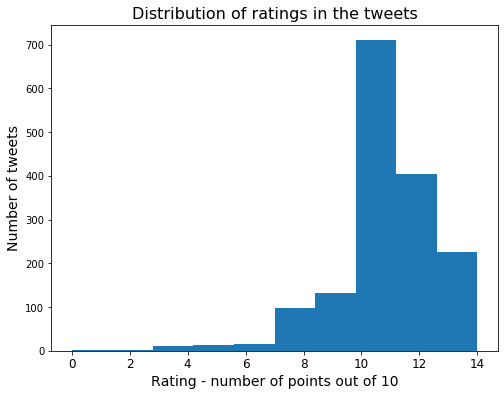

In [105]:
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(twitter_df_10['rating_numerator'], bins=10);

# Adjust histogram appearance
plt.title('Distribution of ratings in the tweets', fontsize=16)
plt.xlabel('Rating - number of points out of 10', fontsize=14)
plt.ylabel('Number of tweets', fontsize=14)
plt.ticklabel_format(axis='x', style='plain')
plt.tick_params(axis='x', labelsize=12)

# Save the figure
plt.savefig('standard_ratings_distribution');

The most common rating is between 10 and 12.

Finally, calculate the average ratings for dog breeds, and show the top 20:

In [106]:
# Calculate average ratings grouped by the dog breed, sort and show the top 20
twitter_df_10.groupby(['dog_breed'])['rating_numerator'].mean().sort_values(ascending=False).head(20)

dog_breed
saluki                        12.500000
briard                        12.333333
border terrier                12.142857
standard schnauzer            12.000000
tibetan mastiff               12.000000
silky terrier                 12.000000
gordon setter                 11.750000
samoyed                       11.621622
golden retriever              11.543046
australian terrier            11.500000
giant schnauzer               11.500000
norfolk terrier               11.428571
chow                          11.404255
great pyrenees                11.384615
pembroke                      11.382979
irish water spaniel           11.333333
leonberg                      11.333333
greater swiss mountain dog    11.333333
doberman                      11.333333
cocker spaniel                11.285714
Name: rating_numerator, dtype: float64

This list is different from the list of the most common dog breed. Golden retriever, the most common breed, gets an average rating of 11.5/10.

### Likes and retweets
#### Tweets of what dog breeds are the most favorite and the most retweeted ones?
I'll continue with the subset of data with "normal" ratings.

In [107]:
# Create a list of the 20 most common dog breeds
common_breeds = twitter_df_10['dog_breed'].value_counts().head(20).index
common_breeds

Index(['golden retriever', 'labrador retriever', 'pembroke', 'chihuahua',
       'pug', 'toy poodle', 'chow', 'pomeranian', 'samoyed', 'malamute',
       'chesapeake bay retriever', 'french bulldog', 'cocker spaniel',
       'miniature pinscher', 'cardigan', 'staffordshire bullterrier',
       'eskimo dog', 'german shepherd', 'beagle', 'shih-tzu'],
      dtype='object')

In [108]:
# Create a subset of dataset with standard ratings (rating_denominator=10) and common dog breeds
twitter_df_10_common = twitter_df_10[twitter_df_10['dog_breed'].isin(common_breeds)]

In [109]:
# Calculate average retweet and favorite counts, and store the result in a dataframe
twitter_df_10_common_mean = twitter_df_10_common.groupby('dog_breed')[['retweet_count', 'favorite_count']].mean().reset_index().sort_values('retweet_count', ascending=False)
twitter_df_10_common_mean

,dog_breed,retweet_count,favorite_count
7,french bulldog,4807.233333,18737.900000
5,cocker spaniel,3635.607143,11577.321429
16,samoyed,3614.810811,11413.837838
1,cardigan,3321.285714,11703.619048
9,golden retriever,3159.781457,11310.218543
13,pembroke,2724.340426,10182.989362
10,labrador retriever,2524.525253,9364.242424
4,chow,2473.893617,8818.765957
2,chesapeake bay retriever,2409.966667,9393.900000
8,german shepherd,2356.700000,9479.900000


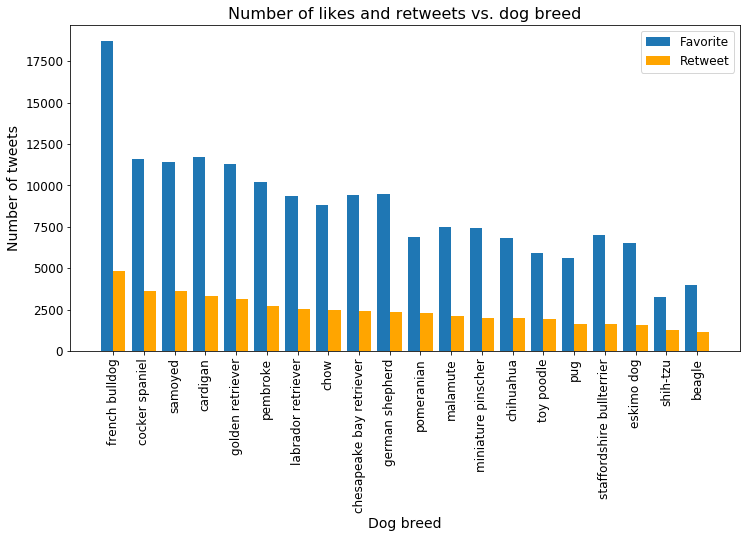

In [110]:
 # Create bar chart
plt.figure(figsize=(12, 6))
locations = np.arange(len(twitter_df_10_common_mean))
heights_f = twitter_df_10_common_mean['favorite_count']
heights_r = twitter_df_10_common_mean['retweet_count']
labels = twitter_df_10_common_mean['dog_breed']
width = 0.4
plt.bar(locations-0.2, heights_f, width, label='Favorite');
plt.bar(locations+0.2, heights_r, width, label='Retweet', color='orange')

# Adjust bar chart appearance
plt.title('Number of likes and retweets vs. dog breed', fontsize=16)
plt.xlabel('Dog breed', fontsize=14)
plt.ylabel('Number of tweets', fontsize=14)
plt.xticks(locations, labels, rotation=90)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.legend(fontsize=12)

# Save the figure
plt.savefig('dog_breeds_retweets_likes');

The most liked and retweeted tweets are those with breeds like french bulldog, cocker spaniel, samoyed, cardigan (perhaps [this one](https://en.wikipedia.org/wiki/Cardigan_Welsh_Corgi)) and golden retriever. Generally, the highest favorite counts (likes) are associated with the highest retweet counts - in the group of the most common dog breeds with the standard rating (i.e. some number out of 10).

### Likes, retweets and ratings
#### Is there any relationship between likes and ratings, and retweets and ratings?
Finally, explore whether the tweets with the highest ratings have the highest retweets and likes. Continue with the subset of tweets with normal ratings, but take in all dog breeds, not just the most common ones.

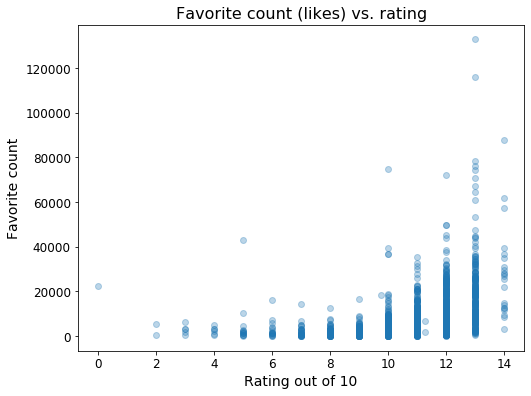

In [111]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x=twitter_df_10['rating_numerator'], y=twitter_df_10['favorite_count'], alpha=0.3)

# Adjust scatter plot appearance
plt.title('Favorite count (likes) vs. rating', fontsize=16)
plt.xlabel('Rating out of 10', fontsize=14)
plt.ylabel('Favorite count', fontsize=14)
plt.ticklabel_format(axis='both', style='plain')
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12);

# Save the figure
plt.savefig('ratings_likes');

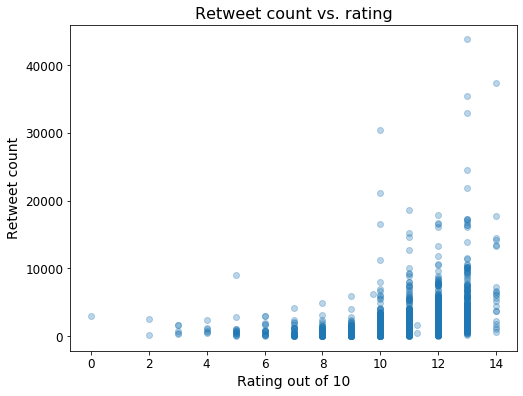

In [112]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x=twitter_df_10['rating_numerator'], y=twitter_df_10['retweet_count'], alpha=0.3)

# Adjust scatter plot appearance
plt.title('Retweet count vs. rating', fontsize=16)
plt.xlabel('Rating out of 10', fontsize=14)
plt.ylabel('Retweet count', fontsize=14)
plt.ticklabel_format(axis='both', style='plain')
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12);

# Save the figure
plt.savefig('ratings_retweets');

In general, I can conclude that tweets with high ratings tend to have higher number of retweets and likes. However, there are some outliers. 